In [24]:
import pandas as pd
from pandas import DataFrame, read_excel, merge
import numpy as np
import matplotlib.pyplot as plt
#import rex
from collections import OrderedDict
import seaborn as sns
import matplotlib as mt

In [25]:
data = pd.read_csv('D:\\Learning\\Time Series Analysis - Real time data\\Head_and_Shoulder\\Head_and_Shoulder_updated.csv', encoding="utf-8")

In [26]:
#data.dtypes

In [27]:
data['end']=data['end'].astype(str)
data['head']=data['head'].astype(str)
data['left_shoulder']=data['left_shoulder'].astype(str)
data['right_shoulder']=data['right_shoulder'].astype(str)
data['start']=data['start'].astype(str)

In [28]:
data['x']=data['end']+","+data['head']+","+data['left_shoulder']+","+data['right_shoulder']+","+data['start']
data = data.drop(columns=['Unnamed: 0'])
data1=data[["x"]]
data1.to_csv('D:\\Learning\\Time Series Analysis - Real time data\\Double_Bottom\\Double_Bottom_updated1_only_co-ordinates.csv')
data11 = pd.read_csv('D:\\Learning\\Time Series Analysis - Real time data\\Double_Bottom\\Double_Bottom_updated1_only_co-ordinates.csv', encoding = "utf-8")
data11 = data11.drop(columns=['Unnamed: 0'])
#data11

In [29]:
data2 = pd.DataFrame(data11)
data2["first_x"] = data2["x"][0]
#data2["first_y"] = data2["y"][0]
data2["first_x"][1:4] = ""
#data2["first_y"][1:4] = ""
data2["x"].apply(lambda x: len(x.split(',')))
data3 = data2.drop(columns=['x'])
#data3
#data2['comma_count'] = data2.x.str.count(',')
#data2['comma_count'][0]

In [30]:
newx = data3["first_x"].str.split(",", n =10, expand = True)
#newy = data3["first_y"].str.split(",", n =4, expand = True)
data3["x_0"] = pd.to_numeric(newx[0])
data3["x_1"] = pd.to_numeric(newx[1])
data3["x_2"] = pd.to_numeric(newx[2])
data3["x_3"] = pd.to_numeric(newx[3])
data3["x_4"] = pd.to_numeric(newx[4])
data3["x_5"] = pd.to_numeric(newx[5])
data3["x_6"] = pd.to_numeric(newx[6])
data3["x_7"] = pd.to_numeric(newx[7])
data3["x_8"] = pd.to_numeric(newx[8])
data3["x_9"] = pd.to_numeric(newx[9])
data3["xx_1"] = pd.to_numeric(newx[10])
#data3["xx_2"] = pd.to_numeric(newx[11])
#data3["xx_3"] = pd.to_numeric(newx[12])
#data3["xx_4"] = pd.to_numeric(newx[13])
#data3["xx_5"] = pd.to_numeric(newx[14])
#data3["xx_6"] = pd.to_numeric(newx[15])
#data3["xx_7"] = pd.to_numeric(newx[16])
#data3["xx_8"] = pd.to_numeric(newx[17])
#data3["xx_9"] = pd.to_numeric(newx[18])
#data3["xxx_1"] = pd.to_numeric(newx[19])

In [31]:
#data3

In [32]:
data3 = data3.melt(id_vars = ["first_x"],
                 var_name = "xx",
                 value_name = "Value")

data3 = data3.sort_values(by = ["xx"])
data3 = data3.mask(data3.eq('None')).dropna()
data3['Value'].replace('',np.nan, inplace=True)
data3.dropna(subset=['Value'], inplace = True)
data3

,first_x,xx,Value
0,"1553731200000, 1549929600000, 1550534400000, 1...",x_0,1.553731e+12
4,"1553731200000, 1549929600000, 1550534400000, 1...",x_0,1.553731e+12
5,"1553731200000, 1549929600000, 1550534400000, 1...",x_1,1.549930e+12
9,"1553731200000, 1549929600000, 1550534400000, 1...",x_1,1.549930e+12
14,"1553731200000, 1549929600000, 1550534400000, 1...",x_2,1.550534e+12
10,"1553731200000, 1549929600000, 1550534400000, 1...",x_2,1.550534e+12
15,"1553731200000, 1549929600000, 1550534400000, 1...",x_3,1.551398e+12
19,"1553731200000, 1549929600000, 1550534400000, 1...",x_3,1.551398e+12
20,"1553731200000, 1549929600000, 1550534400000, 1...",x_4,1.547078e+12
24,"1553731200000, 1549929600000, 1550534400000, 1...",x_4,1.547078e+12


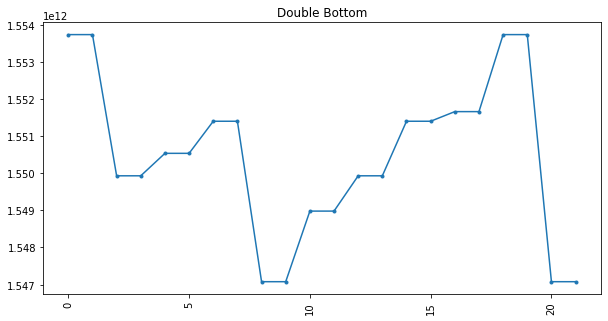

In [36]:
data3["xx"].value_counts()
graph_x = data3['Value'][0:22].tolist()
fig= plt.figure(figsize=(10, 5))
plt.title("Double Bottom")
plt.xticks(rotation=90)
plt.plot(graph_x,marker=".")
plt.show()

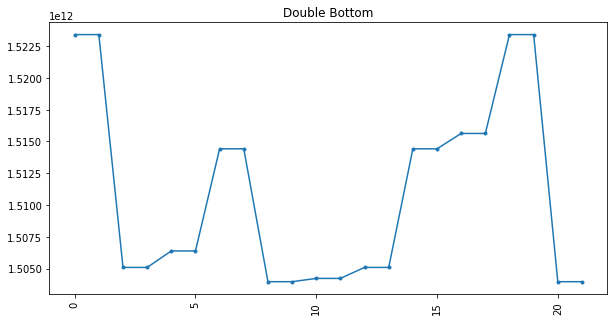

In [37]:
data = pd.read_csv('D:\\Learning\\Time Series Analysis - Real time data\\Head_and_Shoulder\\Head_and_Shoulder_updated.csv', encoding="utf-8")
data['end']=data['end'].astype(str)
data['head']=data['head'].astype(str)
data['left_shoulder']=data['left_shoulder'].astype(str)
data['right_shoulder']=data['right_shoulder'].astype(str)
data['start']=data['start'].astype(str)
data['x']=data['end']+","+data['head']+","+data['left_shoulder']+","+data['right_shoulder']+","+data['start']
data = data.drop(columns=['Unnamed: 0'])
data1=data[["x"]]
data1.to_csv('D:\\Learning\\Time Series Analysis - Real time data\\Double_Bottom\\Double_Bottom_updated1_only_co-ordinates.csv')
data11 = pd.read_csv('D:\\Learning\\Time Series Analysis - Real time data\\Double_Bottom\\Double_Bottom_updated1_only_co-ordinates.csv', encoding = "utf-8")
data11 = data11.drop(columns=['Unnamed: 0'])
data11
data2 = pd.DataFrame(data11)
data2["first_x"] = data2["x"][1]
#data2["first_y"] = data2["y"][1]
data2["first_x"][1:4] = ""
#data2["first_y"][1:4] = ""
data2["x"].apply(lambda x: len(x.split(',')))
data3 = data2.drop(columns=['x'])
data3
#data2['comma_count'] = data2.x.str.count(',')
#data2['comma_count'][0]
newx = data3["first_x"].str.split(",", n =10, expand = True)
#newy = data3["first_y"].str.split(",", n =4, expand = True)
data3["x_0"] = pd.to_numeric(newx[0])
data3["x_1"] = pd.to_numeric(newx[1])
data3["x_2"] = pd.to_numeric(newx[2])
data3["x_3"] = pd.to_numeric(newx[3])
data3["x_4"] = pd.to_numeric(newx[4])
data3["x_5"] = pd.to_numeric(newx[5])
data3["x_6"] = pd.to_numeric(newx[6])
data3["x_7"] = pd.to_numeric(newx[7])
data3["x_8"] = pd.to_numeric(newx[8])
data3["x_9"] = pd.to_numeric(newx[9])
data3["xx_1"] = pd.to_numeric(newx[10])
data3 = data3.melt(id_vars = ["first_x"],
                 var_name = "xx",
                 value_name = "Value")

data3 = data3.sort_values(by = ["xx"])
data3 = data3.mask(data3.eq('None')).dropna()
data3['Value'].replace('',np.nan, inplace=True)
data3.dropna(subset=['Value'], inplace = True)
data3
data3["xx"].value_counts()
graph_x = data3['Value'][0:22].tolist()
fig= plt.figure(figsize=(10, 5))
plt.title("Double Bottom")
plt.xticks(rotation=90)
plt.plot(graph_x,marker=".")
plt.show()

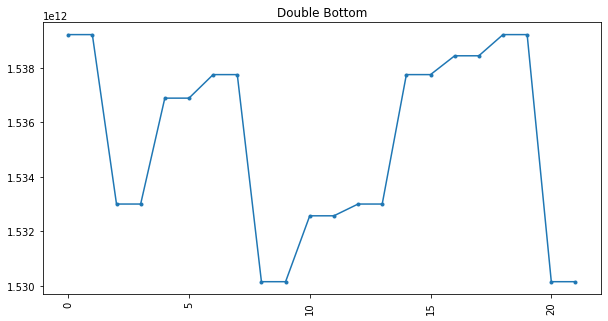

In [38]:
data = pd.read_csv('D:\\Learning\\Time Series Analysis - Real time data\\Head_and_Shoulder\\Head_and_Shoulder_updated.csv', encoding="utf-8")
data['end']=data['end'].astype(str)
data['head']=data['head'].astype(str)
data['left_shoulder']=data['left_shoulder'].astype(str)
data['right_shoulder']=data['right_shoulder'].astype(str)
data['start']=data['start'].astype(str)
data['x']=data['end']+","+data['head']+","+data['left_shoulder']+","+data['right_shoulder']+","+data['start']
data = data.drop(columns=['Unnamed: 0'])
data1=data[["x"]]
data1.to_csv('D:\\Learning\\Time Series Analysis - Real time data\\Double_Bottom\\Double_Bottom_updated1_only_co-ordinates.csv')
data11 = pd.read_csv('D:\\Learning\\Time Series Analysis - Real time data\\Double_Bottom\\Double_Bottom_updated1_only_co-ordinates.csv', encoding = "utf-8")
data11 = data11.drop(columns=['Unnamed: 0'])
data11
data2 = pd.DataFrame(data11)
data2["first_x"] = data2["x"][2]
#data2["first_y"] = data2["y"][2]
data2["first_x"][1:4] = ""
#data2["first_y"][1:4] = ""
data2["x"].apply(lambda x: len(x.split(',')))
data3 = data2.drop(columns=['x'])
data3
#data2['comma_count'] = data2.x.str.count(',')
#data2['comma_count'][0]
newx = data3["first_x"].str.split(",", n =10, expand = True)
#newy = data3["first_y"].str.split(",", n =4, expand = True)
data3["x_0"] = pd.to_numeric(newx[0])
data3["x_1"] = pd.to_numeric(newx[1])
data3["x_2"] = pd.to_numeric(newx[2])
data3["x_3"] = pd.to_numeric(newx[3])
data3["x_4"] = pd.to_numeric(newx[4])
data3["x_5"] = pd.to_numeric(newx[5])
data3["x_6"] = pd.to_numeric(newx[6])
data3["x_7"] = pd.to_numeric(newx[7])
data3["x_8"] = pd.to_numeric(newx[8])
data3["x_9"] = pd.to_numeric(newx[9])
data3["xx_1"] = pd.to_numeric(newx[10])
data3 = data3.melt(id_vars = ["first_x"],
                 var_name = "xx",
                 value_name = "Value")

data3 = data3.sort_values(by = ["xx"])
data3 = data3.mask(data3.eq('None')).dropna()
data3['Value'].replace('',np.nan, inplace=True)
data3.dropna(subset=['Value'], inplace = True)
data3
data3["xx"].value_counts()
graph_x = data3['Value'][0:22].tolist()
fig= plt.figure(figsize=(10, 5))
plt.title("Double Bottom")
plt.xticks(rotation=90)
plt.plot(graph_x,marker=".")
plt.show()

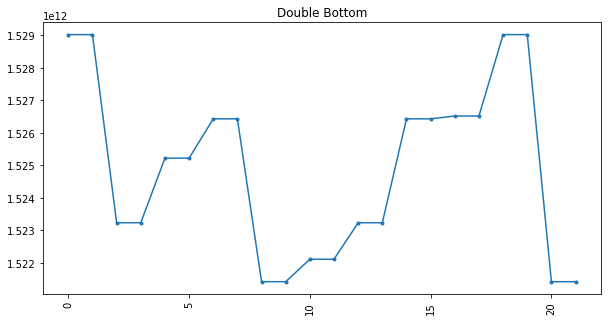

In [39]:
data = pd.read_csv('D:\\Learning\\Time Series Analysis - Real time data\\Head_and_Shoulder\\Head_and_Shoulder_updated.csv', encoding="utf-8")
data['end']=data['end'].astype(str)
data['head']=data['head'].astype(str)
data['left_shoulder']=data['left_shoulder'].astype(str)
data['right_shoulder']=data['right_shoulder'].astype(str)
data['start']=data['start'].astype(str)
data['x']=data['end']+","+data['head']+","+data['left_shoulder']+","+data['right_shoulder']+","+data['start']
data = data.drop(columns=['Unnamed: 0'])
data1=data[["x"]]
data1.to_csv('D:\\Learning\\Time Series Analysis - Real time data\\Double_Bottom\\Double_Bottom_updated1_only_co-ordinates.csv')
data11 = pd.read_csv('D:\\Learning\\Time Series Analysis - Real time data\\Double_Bottom\\Double_Bottom_updated1_only_co-ordinates.csv', encoding = "utf-8")
data11 = data11.drop(columns=['Unnamed: 0'])
data11
data2 = pd.DataFrame(data11)
data2["first_x"] = data2["x"][3]
#data2["first_y"] = data2["y"][3]
data2["first_x"][1:4] = ""
#data2["first_y"][1:4] = ""
data2["x"].apply(lambda x: len(x.split(',')))
data3 = data2.drop(columns=['x'])
data3
#data2['comma_count'] = data2.x.str.count(',')
#data2['comma_count'][0]
newx = data3["first_x"].str.split(",", n =10, expand = True)
#newy = data3["first_y"].str.split(",", n =4, expand = True)
data3["x_0"] = pd.to_numeric(newx[0])
data3["x_1"] = pd.to_numeric(newx[1])
data3["x_2"] = pd.to_numeric(newx[2])
data3["x_3"] = pd.to_numeric(newx[3])
data3["x_4"] = pd.to_numeric(newx[4])
data3["x_5"] = pd.to_numeric(newx[5])
data3["x_6"] = pd.to_numeric(newx[6])
data3["x_7"] = pd.to_numeric(newx[7])
data3["x_8"] = pd.to_numeric(newx[8])
data3["x_9"] = pd.to_numeric(newx[9])
data3["xx_1"] = pd.to_numeric(newx[10])
data3 = data3.melt(id_vars = ["first_x"],
                 var_name = "xx",
                 value_name = "Value")

data3 = data3.sort_values(by = ["xx"])
data3 = data3.mask(data3.eq('None')).dropna()
data3['Value'].replace('',np.nan, inplace=True)
data3.dropna(subset=['Value'], inplace = True)
data3
data3["xx"].value_counts()
graph_x = data3['Value'][0:22].tolist()
fig= plt.figure(figsize=(10, 5))
plt.title("Double Bottom")
plt.xticks(rotation=90)
plt.plot(graph_x,marker=".")
plt.show()

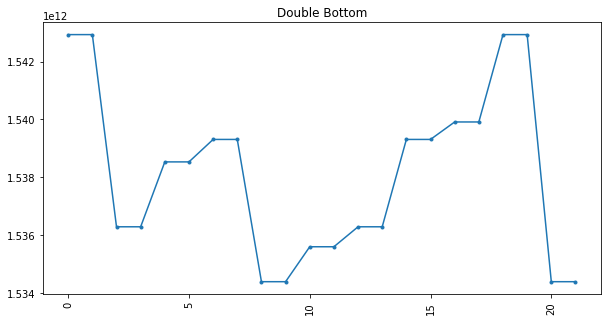

In [40]:
data = pd.read_csv('D:\\Learning\\Time Series Analysis - Real time data\\Head_and_Shoulder\\Head_and_Shoulder_updated.csv', encoding="utf-8")
data['end']=data['end'].astype(str)
data['head']=data['head'].astype(str)
data['left_shoulder']=data['left_shoulder'].astype(str)
data['right_shoulder']=data['right_shoulder'].astype(str)
data['start']=data['start'].astype(str)
data['x']=data['end']+","+data['head']+","+data['left_shoulder']+","+data['right_shoulder']+","+data['start']
data = data.drop(columns=['Unnamed: 0'])
data1=data[["x"]]
data1.to_csv('D:\\Learning\\Time Series Analysis - Real time data\\Double_Bottom\\Double_Bottom_updated1_only_co-ordinates.csv')
data11 = pd.read_csv('D:\\Learning\\Time Series Analysis - Real time data\\Double_Bottom\\Double_Bottom_updated1_only_co-ordinates.csv', encoding = "utf-8")
data11 = data11.drop(columns=['Unnamed: 0'])
data11
data2 = pd.DataFrame(data11)
data2["first_x"] = data2["x"][4]
#data2["first_y"] = data2["y"][4]
data2["first_x"][1:4] = ""
#data2["first_y"][1:4] = ""
data2["x"].apply(lambda x: len(x.split(',')))
data3 = data2.drop(columns=['x'])
data3
#data2['comma_count'] = data2.x.str.count(',')
#data2['comma_count'][0]
newx = data3["first_x"].str.split(",", n =10, expand = True)
#newy = data3["first_y"].str.split(",", n =4, expand = True)
data3["x_0"] = pd.to_numeric(newx[0])
data3["x_1"] = pd.to_numeric(newx[1])
data3["x_2"] = pd.to_numeric(newx[2])
data3["x_3"] = pd.to_numeric(newx[3])
data3["x_4"] = pd.to_numeric(newx[4])
data3["x_5"] = pd.to_numeric(newx[5])
data3["x_6"] = pd.to_numeric(newx[6])
data3["x_7"] = pd.to_numeric(newx[7])
data3["x_8"] = pd.to_numeric(newx[8])
data3["x_9"] = pd.to_numeric(newx[9])
data3["xx_1"] = pd.to_numeric(newx[10])
data3 = data3.melt(id_vars = ["first_x"],
                 var_name = "xx",
                 value_name = "Value")

data3 = data3.sort_values(by = ["xx"])
data3 = data3.mask(data3.eq('None')).dropna()
data3['Value'].replace('',np.nan, inplace=True)
data3.dropna(subset=['Value'], inplace = True)
data3
data3["xx"].value_counts()
graph_x = data3['Value'][0:22].tolist()
fig= plt.figure(figsize=(10, 5))
plt.title("Double Bottom")
plt.xticks(rotation=90)
plt.plot(graph_x,marker=".")
plt.show()